

*   mean rating of each image
*   spearman's rank correlation - reliability: Across 25 random splits, the average reliability across all eight categories was ..., min/max category.
*   compute correlation with models (pearson rank correlations?)
*   find "outliers" to compare scores, e.g. bananas with spots, image of groups of items 
*   the role of feature complexity

In [1]:
import pandas as pd
from scipy.stats import spearmanr
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
from scipy import stats

## Data reliability ##

In [2]:
path='/content/drive/MyDrive/typicality/human_rating'
# if windows
# path = 'human_rating_bycat'

banana=pd.read_csv(path+'/banana.csv')
beach=pd.read_csv(path+'/beach.csv')
car=pd.read_csv(path+'/car.csv')
church=pd.read_csv(path+'/church.csv')
lighthouse=pd.read_csv(path+'/lighthouse.csv')
mountain=pd.read_csv(path+'/mountain.csv')
mug=pd.read_csv(path+'/mug.csv')
plane=pd.read_csv(path+'/plane.csv')

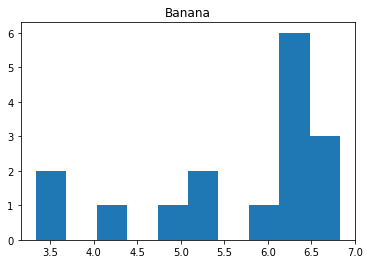

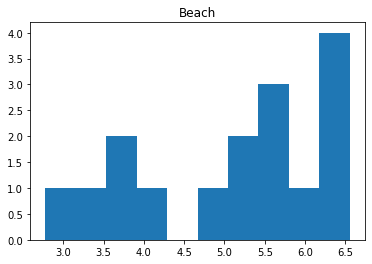

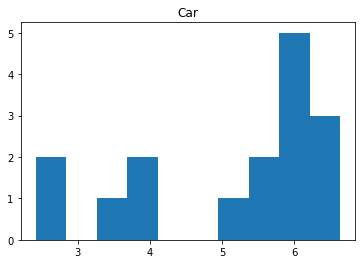

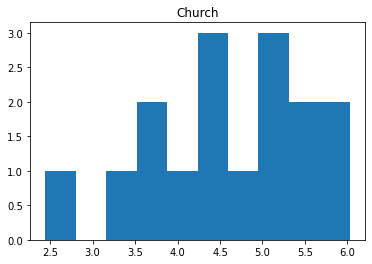

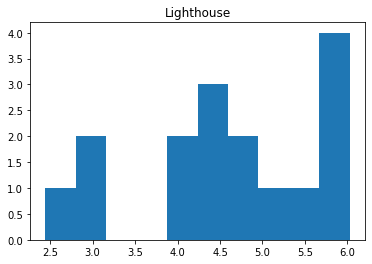

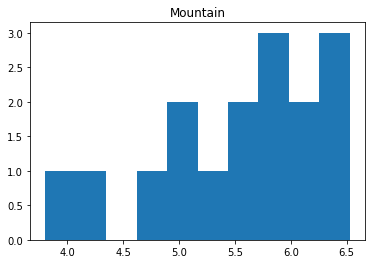

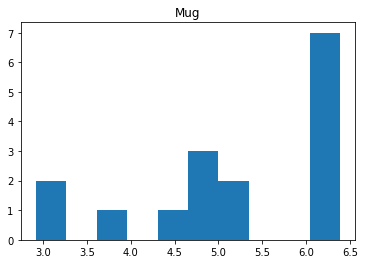

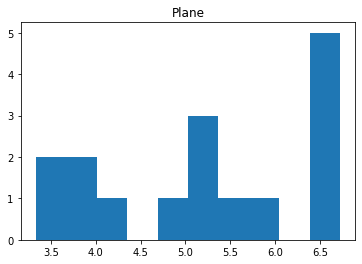

In [12]:
df_lst = [banana, beach, car, church, lighthouse, mountain,
       mug, plane]
df_name = ['Banana', 'Beach', 'Car', 'Church', 'Lighthouse', 'Mountain',
       'Mug', 'Plane']

for idx, df in enumerate(df_lst):
    plt.hist(df.mean())
    plt.title(df_name[idx])
    plt.show()

In [4]:
def compute_reliability(data):
  reliability=[]
  for i in range(25):
    b1, b2=train_test_split(data, test_size=0.5)
    b1, b2=b1.mean(), b2.mean()
    coef, p=spearmanr(b1, b2)
    reliability.append(coef)
  return np.mean(reliability)

In [5]:
res={}
data=[banana, beach, car, church, lighthouse, mountain, mug, plane]
for i, cat in enumerate(data):
  res[i]=compute_reliability(cat)

In [6]:
res

{0: 0.9056680131101938,
 1: 0.9606235388632901,
 2: 0.9397522951807582,
 3: 0.8985512270636297,
 4: 0.8919225099840952,
 5: 0.9157724964920341,
 6: 0.8884577754306239,
 7: 0.9529780435929873}

In [7]:
print('min reliability: ', min(res.values()))
print('max reliability: ', max(res.values()))
print('mean reliability: ', sum(res.values())/8)

min reliability:  0.8884577754306239
max reliability:  0.9606235388632901
mean reliability:  0.9192157374647014


In [9]:
'''
print('banana reliability: ', compute_reliability(banana))
print('beach reliability: ', compute_reliability(beach))
print('car reliability: ', compute_reliability(car))
print('church reliability: ', compute_reliability(church))
print('lighthouse reliability: ', compute_reliability(lighthouse))
print('mountain reliability: ', compute_reliability(mountain))
print('mug reliability: ', compute_reliability(mug))
print('plane reliability: ', compute_reliability(plane))
'''

banana reliability:  0.8943434553085899
beach reliability:  0.9570874606549434
car reliability:  0.9413941355800596
church reliability:  0.870834617007957
lighthouse reliability:  0.9065103626395313
mountain reliability:  0.8911753970013531
mug reliability:  0.8748527938967027
plane reliability:  0.945565948035542


## Correlation to models ##

Problem - different order of images in survey and model?

In [53]:
# If windows
# google_df=pd.read_csv('../GoogleNet/googlenet_scores_wordnet_id_closest_label.csv')
# vgg_df=pd.read_csv('../VGG/vgg_scores_wordnet_id_closest_label.csv')
# alex_df=pd.read_csv('../alexnet/alexnet_scores_wordnet_id_closest_label.csv')

google_df.head()

,Unnamed: 0,type,dir,id_labels,readable_labels,similarity_score,closest_id_label,closest_similarity_score,closest_readable_label,closest_prob
0,0,Mountain,../Image/All_Cropped\Mountain\1.jpg,"{'09332890-n': 0.28545108437538147, '09472597-...","{'lakeside': 0.28545108437538147, 'volcano': 0...","{'09332890-n': 0.2, '09472597-n': 0.5, '094686...",09472597-n,0.5,volcano,0.066258
1,1,Mountain,../Image/All_Cropped\Mountain\10.jpg,"{'09468604-n': 0.1293070912361145, '09193705-n...","{'valley': 0.1293070912361145, 'alp': 0.073099...","{'09468604-n': 0.2, '09193705-n': 0.5, '093328...",09193705-n,0.5,alp,0.073099
2,2,Mountain,../Image/All_Cropped\Mountain\11.jpg,"{'09193705-n': 0.6057558655738831, '09472597-n...","{'alp': 0.6057558655738831, 'volcano': 0.20061...","{'09193705-n': 0.5, '09472597-n': 0.5, '094686...",09193705-n,0.5,alp,0.605756
3,3,Mountain,../Image/All_Cropped\Mountain\12.jpg,"{'09193705-n': 0.7249870896339417, '09468604-n...","{'alp': 0.7249870896339417, 'valley': 0.140982...","{'09193705-n': 0.5, '09468604-n': 0.2, '094725...",09193705-n,0.5,alp,0.724987
4,4,Mountain,../Image/All_Cropped\Mountain\13.jpg,"{'09246464-n': 0.4255097806453705, '09468604-n...","{'cliff': 0.4255097806453705, 'valley': 0.1114...","{'09246464-n': 0.25, '09468604-n': 0.2, '09193...",09193705-n,0.5,alp,0.078892


Phoebe 我们windows path和你apple不一样，你记得自己加一下读取的path

In [15]:
# with GoogLeNet
google_df=pd.read_csv('../content/drive/MyDrive/typicality/GoogleNet/googlenet_scores_wordnet_id_closest_label.csv')
vgg_df=pd.read_csv('../content/drive/MyDrive/typicality/GoogleNet/vgg_scores_wordnet_id_closest_label.csv')
alex_df=pd.read_csv('../content/drive/MyDrive/typicality/GoogleNet/alexnet_scores_wordnet_id_closest_label.csv')

google_df.head()

In [55]:
Bana=[google_df[google_df['type']=='Banana']['closest_prob'], 
      alex_df[alex_df['type']=='Banana']['closest_prob'],
      vgg_df[vgg_df['type']=='Banana']['closest_prob']]

Beach=[google_df[google_df['type']=='Beach']['closest_prob'],
       alex_df[alex_df['type']=='Beach']['closest_prob'],
       vgg_df[vgg_df['type']=='Beach']['closest_prob']]

Car=[google_df[google_df['type']=='Car']['closest_prob'],
     alex_df[alex_df['type']=='Car']['closest_prob'],
     vgg_df[vgg_df['type']=='Car']['closest_prob']]

Church=[google_df[google_df['type']=='Church']['closest_prob'],
        alex_df[alex_df['type']=='Church']['closest_prob'],
        vgg_df[vgg_df['type']=='Church']['closest_prob']]

Light=[google_df[google_df['type']=='Lighthouse']['closest_prob'],
       alex_df[alex_df['type']=='Lighthouse']['closest_prob'],
       vgg_df[vgg_df['type']=='Lighthouse']['closest_prob']]

Mount=[google_df[google_df['type']=='Mountain']['closest_prob'],
       alex_df[alex_df['type']=='Mountain']['closest_prob'],
       vgg_df[vgg_df['type']=='Mountain']['closest_prob']]

Mug=[google_df[google_df['type']=='Mug']['closest_prob'],
     alex_df[alex_df['type']=='Mug']['closest_prob'],
     vgg_df[vgg_df['type']=='Mug']['closest_prob']]

Plane=[google_df[google_df['type']=='Plane']['closest_prob'],
       alex_df[alex_df['type']=='Plane']['closest_prob'],
       vgg_df[vgg_df['type']=='Plane']['closest_prob']]

# GoogleNet

In [32]:
#bana=banana.mean()
#Bana=Bana.reset_index(drop=True, inplace=True)
corr=[]
for i in range(banana.shape[0]):
  if i!=17 and i!=21:
    bana=banana.iloc[i]
    coef, p=stats.pearsonr(bana.values, Bana[0].values)
    print(coef)
    #coef=np.corrcoef(bana, Bana)
    #coef, p=spearmanr(bana, Bana)
    corr.append(abs(coef))
bana_corr=np.mean(corr)
print('Banana correlation: ', bana_corr)

-0.23906712895015125
-0.17882927580515057
-0.15560163950940634
-0.1232249092786574
-0.028509595197118313
-0.2536562641947918
-0.17847409634724168
0.03723079547429292
-0.2795493724953268
0.057632258845181236
-0.5096918421648806
0.10161250426379043
-0.2911565685022761
-0.09831980026286863
-0.45873033359482235
-0.06962133128670865
0.11699221611601107
-0.21042114547181667
-0.2983779614946266
-0.1359248495533449
0.1384515338859773
-0.14148865715881392
-0.14148865715881392
-0.17115105113890927
-0.5054106749164883
-0.43178038929998896
-0.14148865715881392
-0.12603227062840894
0.09593165958931556
-0.14148865715881392
-0.044616313583632605
0.00169659117628293
-0.28475238084666077
-0.08809317563706329
Banana correlation:  0.18460278112195433


In [33]:
corr=[]
for i in range(beach.shape[0]):
  #if i!=17 and i!=21:
  bea=beach.iloc[i]
  coef, p=stats.pearsonr(bea.values, Beach[0].values)
  print(coef)
  #coef=np.corrcoef(bea, Beach)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
bea_corr=np.mean(corr)
print('Beach correlation: ', bea_corr)

-0.3117458433802362
-0.2636467591220113
-0.08750763164323612
-0.12871189032809766
-0.08099503533605659
-0.37052504983463985
-0.39653392296977785
-0.3488038078964707
-0.02527656092957735
-0.029350762245087453
-0.13253701915226157
0.0569398439083853
-0.1531344412977058
-0.2777382508988233
-0.010510518732101862
-0.3868673368625667
-0.08653467138536458
-0.014423719305784989
-0.33248563725115243
-0.33935251778896885
-0.023038395262155828
-0.015602691247197972
-0.055513214328882426
-0.21958445288242387
0.05916950307417454
-0.24968509603519093
-0.07139594327964952
-0.25803571015445487
-0.26112416306557346
-0.2575342267878204
-0.07222243105749859
0.13747273442907915
-0.2580907336172793
-0.21267846010921038
-0.2138976831011663
-0.26480144723108445
Beach correlation:  -0.16545288730855198


In [34]:
corr=[]
for i in range(car.shape[0]):
  #if i!=17 and i!=21:
  ca=car.iloc[i]
  coef, p=stats.pearsonr(ca.values, Car[0].sort_index().values)
  print(coef)
  #coef=np.corrcoef(ca, Car)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
car_corr=np.mean(corr)
print('Car correlation: ', car_corr)

-0.4822569964964491
-0.4638689155065948
-0.36253549303922583
-0.3900499850733414
-0.5753937663334753
-0.3091285707021069
-0.2913944914749889
-0.500481228268985
-0.16494390408253962
-0.0998145166852463
0.10012384416161482
-0.2837873604172239
-0.3591175084289855
-0.1705100954066919
-0.48903652145349946
-0.6279214122992075
-0.5374988171248875
-0.35738465986350504
-0.3343706075950294
-0.3520435230294987
-0.3697712099785676
-0.26702730273721825
-0.23136405318801337
-0.3682446636019559
-0.3840829786233306
-0.20953561089686804
-0.22167994242975447
-0.42962821143903657
-0.33622078665745203
-0.4769373233703838
-0.41414730633175156
-0.2964508764150586
-0.44688378012024327
-0.4404693030408955
-0.040109105091071455
0.024875603876970243
Car correlation:  -0.33219698275456944


In [35]:
corr=[]
for i in range(church.shape[0]):
  #if i!=17 and i!=21:
  ch=church.iloc[i]
  coef, p=stats.pearsonr(ch.values, Church[0].values)
  print(coef)
  #coef=np.corrcoef(ch, Church)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
church_corr=np.mean(corr)
print('Church correlation: ', church_corr)

-0.11565449357529414
0.06638508664125925
-0.16157128821055297
-0.296669011955179
0.427057062025023
-0.04186794220023715
-0.10885618371043529
0.2018528287021613
0.3572016529974519
-0.13143404985351245
-0.004624236330501186
-0.00447899545612835
-0.001325179769077589
-0.19046306923507783
-0.4202656025473696
-0.3058666926391787
0.554115104790121
-0.30338636111506817
-0.3054327908558015
-0.38806148173521204
-0.31315596508575283
-0.2975497674593709
0.32575555767002906
0.09041023390075964
-0.10011367768622734
-0.2007199606589072
-0.24833536008656887
0.4142568505638561
0.1483129868663484
-0.46742858783959645
0.13887441624223296
-0.43100022159488016
-0.2695982406857639
0.2333216313761113
-0.126094607150596
-0.16156677172601183
Church correlation:  -0.06772158687185964


In [36]:
corr=[]
for i in range(lighthouse.shape[0]):
  #if i!=17 and i!=21:
  li=lighthouse.iloc[i]
  coef, p=stats.pearsonr(li.values, Light[0].values)
  print(coef)
  #coef=np.corrcoef(li, Light)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
light_corr=np.mean(corr)
print('Lighthouse correlation: ', light_corr)

0.25434127429316117
0.19234622499573642
-0.024006979799047437
-0.047417569487520725
-0.13109581203338866
-0.2390424334923123
0.313963217390041
-0.10104705286011575
-0.18694064377405217
-0.014287611635699141
-0.3555598901799326
0.03845433393594845
0.03748357853119177
0.22922634095741704
-0.15434711607335427
0.05070320036574599
-0.057381676739788584
0.03749049205603183
-0.07323604204825167
0.13395841394705488
0.21755866239780122
-0.4854892195444202
-0.16948121947899966
0.06904028650520828
0.12143849577375776
0.0927629398235783
-0.04535123080847964
-0.240671069416895
-0.08113643973468948
-0.12941230409271995
-0.1922623840885133
-0.024109422073064143
0.15716068720666826
0.008582274440065128
0.01997261059664618
0.3291662271625535
Lighthouse correlation:  -0.012461857138406604


In [37]:
mountain.iloc[31]

1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    7
12    7
13    7
14    7
15    7
16    7
Name: 31, dtype: int64

In [38]:
corr=[]
for i in range(mountain.shape[0]):
  if i!=31:
    mount=mountain.iloc[i]
    coef, p=stats.pearsonr(mount.values, Mount[0].values)
    print(coef)
  #coef=np.corrcoef(mount, Mount)
    #coef, p=spearmanr(bana, Bana)
    corr.append(coef)
mount_corr=np.mean(corr)
print('Mountain correlation: ', mount_corr)

0.15168203882768716
-0.007930298257556284
0.19733223069572145
0.21341201109246793
0.0669083826057458
-0.15323006195913685
-0.019792020313967547
0.2083607489363072
0.36537082746950195
0.1650461691284034
-0.31309160853256945
-0.09746023932161431
-0.3119507305387798
0.009172392873242508
0.07915251875457757
-0.07373842294801546
-0.0611245685996018
0.002256151618420632
-0.20641358273446703
0.029337939428862876
0.0863665322560922
-0.3119507305387798
-0.3119507305387798
0.222357511270223
-0.3119507305387798
0.040378718609388686
-0.4819140130007622
0.19082323643342375
-0.1854159056259106
-0.06910345626151707
-0.06280317241443605
0.035802430188173306
-0.03475853943883808
-0.016411263009823658
0.34273502848701076
Mountain correlation:  -0.017842720168516728


In [39]:
corr=[]
for i in range(mug.shape[0]):
  #if i!=17 and i!=21:
  m=mug.iloc[i]
  coef, p=stats.pearsonr(m.values, Mug[0].values)
  print(coef)
  #coef=np.corrcoef(m, Mug)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
mug_corr=np.mean(corr)
print('Mug correlation: ', mug_corr)

0.174178925950916
0.18278317728481913
0.1443851160880078
0.02864451221822026
0.07414642376687837
0.15543518283533772
0.1359623246325865
-0.09772993477508608
0.2679054808272417
-0.05987282022463283
0.0669578032367232
0.03210316121584533
0.1529866503276394
0.11876753967457856
0.10097781126429828
0.15740271233254227
0.27988290762999357
0.2609776109155452
0.13050584178180324
-0.15224943529737694
-0.023849632429044393
0.0356715514701345
0.06100528766020204
0.23625366174945045
0.046260217126076475
0.1590564835640858
0.060820872680661546
0.20748743812560155
0.11473554673643169
-0.17692778815889237
0.13544354150176457
-0.052428087298649395
0.11694886771541313
-0.13636325098374663
-0.044142670069355294
0.0968736801724475
Mug correlation:  0.08308324197912395


In [40]:
corr=[]
for i in range(plane.shape[0]):
  #if i!=17 and i!=21:
  pla=plane.iloc[i]
  coef, p=stats.pearsonr(pla.values, Plane[0].values)
  print(coef)
  #coef=np.corrcoef(pla, Plane)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
plane_corr=np.mean(corr)
print('Plane correlation: ', plane_corr)

0.443574273527239
0.35692065486417246
0.4175366961888424
0.42396096781400416
0.3768120269071701
0.3834165961701742
0.7059130341490374
0.14989720602978773
-0.1916420510442327
0.3041555094474372
0.38198557975651865
0.303299443508123
0.37506210664350637
0.5059628311101488
0.3068354169195979
0.4429535611006278
0.4264324206426888
0.6231793688923748
0.18720269377617682
0.5862553499355435
0.36748636899062315
0.26214175309761173
0.37746196877958643
0.3469439864949967
0.19720275704592982
0.34480664563004904
0.3205105639126453
0.022048231327823103
0.3405501194422066
0.38726138537116583
0.31548901073042523
0.18628393761617923
0.3189608536270852
0.42812996065730424
0.5152801528382716
0.4752246756860024
Plane correlation:  0.3532082238218568


In [41]:
sum_corr=bana_corr+bea_corr+car_corr+church_corr+mount_corr+mug_corr+plane_corr+light_corr
avg_corr=sum_corr/8
avg_corr

0.003152276585128834

# AlexNet

In [57]:
#bana=banana.mean()
#Bana=Bana.reset_index(drop=True, inplace=True)
corr=[]
for i in range(banana.shape[0]):
  if i!=17 and i!=21:
    bana=banana.iloc[i]
    coef, p=stats.pearsonr(bana.values, Bana[1].values)
    print(coef)
    #coef=np.corrcoef(bana, Bana)
    #coef, p=spearmanr(bana, Bana)
    corr.append(abs(coef))
bana_corr=np.mean(corr)
print('Banana correlation: ', bana_corr)

0.005870756730260773
-0.17826536636580878
-0.19737858144103726
0.01241609860539445
0.14493981106526715
-0.03390858157094099
-0.2677966054919072
0.18043903204701656
-0.0028388697012761976
0.036294563545653274
-0.20289367741566622
0.3489255051143361
-0.08734195834571228
0.08134376002493451
-0.4204993844287137
-0.0784947430032901
0.30377465984677504
0.0030517925823421443
0.038135195758801185
-0.009369400707880851
-0.01307030557655614
-0.2446245821000741
-0.2446245821000741
0.050270312550083844
-0.42784065440652425
-0.45276670513319806
-0.2446245821000741
0.060253323824270504
0.3079797180920496
-0.2446245821000741
0.1081315029754253
-0.040363445874437784
-0.25851108520772476
0.012619219143852778
Banana correlation:  0.1571847924993363


In [58]:
corr=[]
for i in range(beach.shape[0]):
  #if i!=17 and i!=21:
  bea=beach.iloc[i]
  coef, p=stats.pearsonr(bea.values, Beach[1].values)
  print(coef)
  #coef=np.corrcoef(bea, Beach)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
bea_corr=np.mean(corr)
print('Beach correlation: ', bea_corr)

-0.10472802448084059
-0.0745795797807395
-0.332242974440517
-0.12017381604258265
0.15722581793915957
-0.1263283361835777
-0.4062659325977426
0.03151807217902147
-0.5277577723637701
-0.28144379383436857
-0.0831396976243311
0.09538343380571299
-0.1740374305340217
-0.30567969840825937
0.19390517271360808
-0.079822054148137
0.03930632840224693
-0.10236908238477255
-0.11497387840922352
-0.1481705008729246
0.1975753619536719
-0.0020862299682239405
-0.1826753839375987
0.06617598721235579
-0.18222161320473684
-0.025148446254765533
-0.044099259074080965
-0.20073478596299543
-0.22907954902338473
-0.08060248154032618
0.1755035121497564
0.0660612415168346
-0.0817495832792079
0.09776525349193987
0.18939688594854667
-0.1591363713313918
Beach correlation:  -0.07942858912137961


In [59]:
corr=[]
for i in range(car.shape[0]):
  #if i!=17 and i!=21:
  ca=car.iloc[i]
  coef, p=stats.pearsonr(ca.values, Car[1].sort_index().values)
  print(coef)
  #coef=np.corrcoef(ca, Car)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
car_corr=np.mean(corr)
print('Car correlation: ', car_corr)

-0.4106726896180617
-0.17148921248596344
-0.1487151960960808
-0.19727965627591548
-0.39895379591880464
0.0402857887213218
-0.028689465272377396
-0.3523128774141693
-0.013238514730334758
-0.1773169408426765
-0.06440993116513899
-0.17750420086529844
-0.28791908569078295
0.022649087388410455
-0.3786075913830253
-0.32799949733609374
-0.31811201665937344
-0.2519253772928539
-0.2193890876990292
-0.33156849261184523
-0.2781757256216087
-0.2824959947714358
-0.25268449264711984
-0.2306326808914792
-0.30281833526724145
-0.11556875285203813
-0.3157018854925665
0.1104921463144368
-0.16158950437299155
-0.2844537259393752
-0.11293185161233336
-0.29753302822547595
-0.43762227044611984
-0.20803122206788346
-0.14101932878314574
0.03981831112953868
Car correlation:  -0.2073365859665259


In [60]:
corr=[]
for i in range(church.shape[0]):
  #if i!=17 and i!=21:
  ch=church.iloc[i]
  coef, p=stats.pearsonr(ch.values, Church[1].values)
  print(coef)
  #coef=np.corrcoef(ch, Church)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
church_corr=np.mean(corr)
print('Church correlation: ', church_corr)

0.25714870110281485
0.08433218579622473
-0.12298392060423727
-0.007575407344272145
0.41496847367698875
0.3404734689689509
-0.017027891087931984
0.1308269094524451
0.23873627917474483
0.06107549863299813
0.03882990008906334
0.32372782229246266
0.06961572976708524
0.17992246799758155
-0.14624150973278188
-0.14062939015238596
0.49773895128907797
0.12558814485252873
-0.0965293136041826
0.01145967519387206
0.03583514449421234
-0.08319917337342841
0.4338139130030786
0.21244872921360425
0.22334827119183812
0.1211764876658376
0.05476430129230772
0.1548346743939344
0.1900659552891462
-0.06738848278227699
0.29457165719989714
-0.19305729987512624
0.08384111586134607
0.4468145026458059
0.04644367852407286
0.17981813606913064
Church correlation:  0.12159967740484517


In [61]:
corr=[]
for i in range(lighthouse.shape[0]):
  #if i!=17 and i!=21:
  li=lighthouse.iloc[i]
  coef, p=stats.pearsonr(li.values, Light[1].values)
  print(coef)
  #coef=np.corrcoef(li, Light)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
light_corr=np.mean(corr)
print('Lighthouse correlation: ', light_corr)

0.06409445358527859
0.042363435386670756
-0.057398346354134225
-0.14657171451478343
-0.003685998281599878
-0.29519349531786626
0.00933768753548303
-0.23044134687874235
-0.2163464669026352
0.03301163222320309
-0.27459546278745894
-0.13148386462907208
-0.06653814131801236
-0.06303186338852446
-0.25597588059067583
-0.18088724951596286
-0.19083666689660955
-0.1346700511368701
-0.10268562799868639
0.08001279072676953
0.1848408259448824
-0.5716453667801685
-0.25966711473140847
0.10040688414571178
0.021531021379252918
0.12271835734853115
-0.08659161074377728
-0.27453788924096734
-0.07148301685934558
0.06414344441888421
-0.13739326501896626
-0.1804006843062841
0.014036894553543622
-0.2079869501075644
-0.20403260724200167
0.15634285309274515
Lighthouse correlation:  -0.0958677889222545


In [62]:
corr=[]
for i in range(mountain.shape[0]):
  if i!=31:
    mount=mountain.iloc[i]
    coef, p=stats.pearsonr(mount.values, Mount[1].values)
    print(coef)
  #coef=np.corrcoef(mount, Mount)
    #coef, p=spearmanr(bana, Bana)
    corr.append(coef)
mount_corr=np.mean(corr)
print('Mountain correlation: ', mount_corr)

-0.044478396031541086
0.14694928216731928
-0.019495540322456317
0.1316250707271537
-0.1930945068474576
0.036263025129634745
0.20902981012537175
0.06365143718984473
-0.1116142801991925
-0.10198888669262757
-0.5355363338352309
-0.09639574932907367
-0.583348021003095
-0.28684432080524996
0.12316109209202097
-0.1277546106957958
-0.1714327312447413
-0.1543121316265841
-0.14271298398651167
-0.0035749392707124378
0.027443047116230204
-0.5833480210030951
-0.5833480210030951
0.03285165184020761
-0.583348021003095
-0.23239758392414991
-0.5878419455689066
-0.19654726938997363
-0.11227121017210517
-0.09816880925001416
-0.29751228733083884
0.08007329679991929
-0.08063098836620183
-0.06837728989657556
-0.05478218174639887
Mountain correlation:  -0.14857455278162907


In [63]:
corr=[]
for i in range(mug.shape[0]):
  #if i!=17 and i!=21:
  m=mug.iloc[i]
  coef, p=stats.pearsonr(m.values, Mug[1].values)
  print(coef)
  #coef=np.corrcoef(m, Mug)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
mug_corr=np.mean(corr)
print('Mug correlation: ', mug_corr)

0.13385195320630575
0.1005385222861856
0.15656185303318287
0.18542420556956205
-0.0025488304324313704
0.34409919359691854
-0.24330594668997801
-0.3423337150598126
-0.021098706835358385
0.10147768674859156
-0.3231754056268429
0.2960780440115477
0.2631091301241838
0.0513964029628325
-0.12583310197197123
-0.055860617471395785
0.2813164697537982
0.14949790746476457
0.19437836594484878
-0.2759589408742592
-0.1386903091631817
0.1299766464528354
0.2180439293345942
0.23892312158587023
0.24477376339483511
0.028362617673689028
0.28409835340772194
0.1739972564223981
0.03767436622911302
0.01659225943713244
0.08363464821137573
-0.10114541478703648
0.22611083422923745
-0.02688736951037813
-0.035262555680656116
0.016623918631765433
Mug correlation:  0.06290112598916633


In [64]:
corr=[]
for i in range(plane.shape[0]):
  #if i!=17 and i!=21:
  pla=plane.iloc[i]
  coef, p=stats.pearsonr(pla.values, Plane[1].values)
  print(coef)
  #coef=np.corrcoef(pla, Plane)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
plane_corr=np.mean(corr)
print('Plane correlation: ', plane_corr)

0.4524651816723533
0.6588261152301085
0.5559210223652384
0.6616553408251546
0.6181012479132626
0.432509208990936
0.5691039877539499
0.3778223414343049
0.017503446603132633
0.5251923650498724
0.4363908238896256
0.41070513354268484
0.42761833568537777
0.49417344628876025
0.3964626205707876
0.5440206989195756
0.4079078305292072
0.5747654532388018
0.3787223515186299
0.7349769988220153
0.39387372674001775
0.23878421172484735
0.3445932231817618
0.6609155089692366
0.33950296797211676
0.29660353716795007
0.41729682287873593
0.09069838147309175
0.5894519333219915
0.6071345340527228
0.4872363363768275
0.2493036222114892
0.5510341194454433
0.3707939982284983
0.5845133570765843
0.6161347204490459
Plane correlation:  0.45868652644761504


In [65]:
sum_corr=bana_corr+bea_corr+car_corr+church_corr+mount_corr+mug_corr+plane_corr+light_corr
avg_corr=sum_corr/8
avg_corr

0.03364557569364673

# VGG

In [79]:
#bana=banana.mean()
#Bana=Bana.reset_index(drop=True, inplace=True)
corr=[]
for i in range(banana.shape[0]):
  if i!=17 and i!=21:
    bana=banana.iloc[i]
    coef, p=stats.pearsonr(bana.values, Bana[2].values)
    print(coef)
    #coef=np.corrcoef(bana, Bana)
    #coef, p=spearmanr(bana, Bana)
    corr.append(abs(coef))
bana_corr=np.mean(corr)
print('Banana correlation: ', bana_corr)

-0.2659135829836426
-0.2590077836377939
-0.10348751325054834
-0.1334581295486638
-0.14248951838631374
-0.2671704038380023
-0.18290245579571776
-0.058721014803750526
-0.232247797489685
0.06911864620519474
-0.441899654223785
0.03767212104149581
-0.24141854975550503
-0.1686345213755404
-0.4293202901592228
-0.07112735282085474
0.026923424499080695
-0.16493756017285835
-0.4525865699153951
-0.10496318493208627
0.2053647465326176
-0.13570710738185032
-0.13570710738185032
-0.1665341766669821
-0.5391887966860319
-0.4133963561996801
-0.13570710738185032
-0.03018356772378912
-0.04067900904871746
-0.13570710738185032
-0.1378269833043892
0.10939722400307411
-0.18625588168630786
-0.06364191895291803
Banana correlation:  0.18497932838726605


In [80]:
corr=[]
for i in range(beach.shape[0]):
  #if i!=17 and i!=21:
  bea=beach.iloc[i]
  coef, p=stats.pearsonr(bea.values, Beach[2].values)
  print(coef)
  #coef=np.corrcoef(bea, Beach)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
bea_corr=np.mean(corr)
print('Beach correlation: ', bea_corr)

0.0767666669761058
0.5162856210021386
-0.14421399378885252
0.015988471591514383
0.15286507722195747
0.21321473199435775
-0.3513000567701539
0.23350517931292894
-0.1804230481672033
0.039363050099314095
0.13554750157956114
0.16070203347931603
0.24629869273581106
-0.18792159134758318
0.015321174597074744
0.07322215774382236
0.11007108701852847
-0.1595288094780773
0.03287195244492329
-0.11685796169057633
0.10462713606036791
0.06377923972234742
0.07117283855710196
-0.06075973714786919
-0.010707412066484415
0.03080466746493829
0.08780520942909932
0.05671272319098572
-0.07441576935806238
-0.037877384634664155
0.00733423990442994
0.07105784939749124
0.163950572692968
0.04707472024238196
0.10052304490199018
-0.0069284573742282585
Beach correlation:  0.041553650487158374


In [81]:
corr=[]
for i in range(car.shape[0]):
  #if i!=17 and i!=21:
  ca=car.iloc[i]
  coef, p=stats.pearsonr(ca.values, Car[2].sort_index().values)
  print(coef)
  #coef=np.corrcoef(ca, Car)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
car_corr=np.mean(corr)
print('Car correlation: ', car_corr)

-0.04238790578738255
0.07307298532570823
-0.02563680950609651
0.14882632491191752
-0.02439634520489936
0.20810780241770593
-0.4394684954898502
0.05861494911161012
-0.3980483694749015
0.24344360251250216
0.5008940698862461
0.16941148041525245
0.10015848090857771
0.38692608022578123
0.116844054815843
-0.1562369203447172
-0.05115681350551134
0.14523192293600345
0.2178763174993203
0.2099459006159763
0.14968897620954683
0.150425934744529
0.20789546742031795
0.1257194058275793
0.0006416763138135592
0.36116683100149505
0.07681449063598493
-0.2954238398099863
0.12313788091015654
0.029534267214370108
0.13155389925479993
0.06269599319788055
0.11138456109102621
0.12786902774781989
0.40469346765132264
0.3492455142067892
Car correlation:  0.0988629407190703


In [82]:
corr=[]
for i in range(church.shape[0]):
  #if i!=17 and i!=21:
  ch=church.iloc[i]
  coef, p=stats.pearsonr(ch.values, Church[2].values)
  print(coef)
  #coef=np.corrcoef(ch, Church)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
church_corr=np.mean(corr)
print('Church correlation: ', church_corr)

-0.054999354334394124
-0.06892421332836127
-0.03460796488396947
-0.3639655612715976
0.3381794503264706
-0.09167815615816571
0.15588196727859216
0.22936652333560512
-0.11763048362260424
-0.19286397213150164
-0.1822725027619992
0.13687025226051022
0.03154844113052876
-0.3465391920046925
-0.020841703744928802
-0.13133804352598055
0.4995738587810453
-0.16814114764324792
-0.44751041072292974
-0.12183998952947686
-0.23834211064538577
-0.2079850740509305
0.25763712407615713
0.033513623902065276
-0.05329600839273779
-0.2363569095856614
-0.029295216603947044
0.20945458357930952
-0.002754673502221111
-0.1801122544329143
0.25872321064914244
-0.16489295618310018
-0.19314199304374538
0.06790419674210621
-0.26118858502885217
-0.11341907605728928
Church correlation:  -0.05014678669803062


In [83]:
corr=[]
for i in range(lighthouse.shape[0]):
  #if i!=17 and i!=21:
  li=lighthouse.iloc[i]
  coef, p=stats.pearsonr(li.values, Light[2].values)
  print(coef)
  #coef=np.corrcoef(li, Light)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
light_corr=np.mean(corr)
print('Lighthouse correlation: ', light_corr)

0.2520090307946783
0.34385595472876357
0.33357766604236144
0.4106108002339275
0.040922185573841446
-0.011787527737463735
0.3510934320620183
0.027021369258042174
-0.11501055234454008
-0.12395913014933632
0.2136450537469746
0.3628415171376669
0.3284743676975651
0.02914957618264699
0.3166271226690382
0.23526786413887016
0.22896132094370175
0.1823307579079675
0.18308629782534488
0.31690420270761543
0.30813892409405486
-0.17853913362702803
0.24487745063417315
0.4507914618789691
0.322716524622469
0.3793421701178726
-0.09203921793364599
-0.09633309054486168
-0.07784932568055754
-0.1207819043966647
0.28232853569795713
0.1522061463710739
0.20898932268501372
-0.030708193049908614
-0.20959636767944712
0.24648170167314779
Lighthouse correlation:  0.15821239761895284


In [84]:
corr=[]
for i in range(mountain.shape[0]):
  if i!=31:
    mount=mountain.iloc[i]
    coef, p=stats.pearsonr(mount.values, Mount[2].values)
    print(coef)
  #coef=np.corrcoef(mount, Mount)
    #coef, p=spearmanr(bana, Bana)
    corr.append(coef)
mount_corr=np.mean(corr)
print('Mountain correlation: ', mount_corr)

0.18949180812529665
0.16140904343798218
0.19126666682184565
0.16046851891309336
0.014836595634155306
-0.09794717126978414
0.07701762854624411
0.2774684904417286
0.4423116467740432
0.2577656203506128
-0.2828565577051214
-0.11661059444011293
-0.3695646122009915
-0.03496084241160162
0.10067734542472942
-0.02637691947113993
-0.010426475529602797
-0.10740459512876047
-0.007765324459739334
0.003376454692027721
0.039911211238297994
-0.36956461220099157
-0.36956461220099157
0.14910163672418428
-0.3695646122009915
-0.025585809757064662
-0.4066867560546369
0.18812314344062714
-0.3964881727060081
-0.11558045013724652
-0.23739166286999666
0.061093451687307565
-0.1299355233521714
-0.013074520408181717
0.29466765994891164
Mountain correlation:  -0.025096082922972777


In [85]:
corr=[]
for i in range(mug.shape[0]):
  #if i!=17 and i!=21:
  m=mug.iloc[i]
  coef, p=stats.pearsonr(m.values, Mug[2].values)
  print(coef)
  #coef=np.corrcoef(m, Mug)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
mug_corr=np.mean(corr)
print('Mug correlation: ', mug_corr)

-0.05367854347153292
0.011142415268522193
-0.02083718609408315
-0.3496137116115154
-0.1343902067567242
-0.1562649470183429
-0.11138930019110937
-0.43224954919198927
-0.12019592029459282
-0.1965741054138754
0.03522416161698124
-0.31690721888577356
-0.15238347361684818
-0.1322132247210899
0.1958327389661577
0.018883159956394904
-0.038447167296201123
0.024428447473999873
0.001762905955380957
-0.11958702643506063
-0.3561593520626711
-0.09129136294991802
0.0068484894868072535
0.12324205779548895
-0.3330510730518843
-0.05045784687240805
-0.22706123858935195
0.0083430353678879
-0.22855203310277253
-0.4229774022591738
-0.16884467107544765
-0.29050441291056894
0.0637187460707278
-0.2180267235327877
-0.026924468283944417
0.00592917571782816
Mug correlation:  -0.1181451897781525


In [86]:
corr=[]
for i in range(plane.shape[0]):
  #if i!=17 and i!=21:
  pla=plane.iloc[i]
  coef, p=stats.pearsonr(pla.values, Plane[2].values)
  print(coef)
  #coef=np.corrcoef(pla, Plane)
    #coef, p=spearmanr(bana, Bana)
  corr.append(coef)
plane_corr=np.mean(corr)
print('Plane correlation: ', plane_corr)

0.4771046223117984
0.5522809992932914
0.41973450386779176
0.5030714872374262
0.3390062892489138
0.21841765586301276
0.7159985366651912
0.06224516632183813
-0.2967825648538926
0.42421924415450774
0.31914019130778293
0.38904538828202107
0.4662929389102274
0.4024323942641581
0.23665682372541544
0.44518569305310385
0.4357333915998206
0.6232114996383142
0.2876408010151242
0.594610101973401
0.36842296709438827
0.27324203320483076
0.41396977135162066
0.4248897592384938
0.18978056191964526
0.3410859858106126
0.37796270011425426
0.12476321033600667
0.42342334558018724
0.2989922601376604
0.2569548308766733
0.1996559905957765
0.35973186861719186
0.4231329623368311
0.5110838984998352
0.5396215288188881
Plane correlation:  0.36505441217811513


In [87]:
sum_corr=bana_corr+bea_corr+car_corr+church_corr+mount_corr+mug_corr+plane_corr+light_corr
avg_corr=sum_corr/8
avg_corr

0.08190933374892584